# Project-2_Diabetes_Prediction

Diabetic Patients: Exploring the intricacies of diabetic patient data to
identify trends and patterns that can aid in improving healthcare outcomes.

In [42]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('diabetes.csv')

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
data.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [10]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

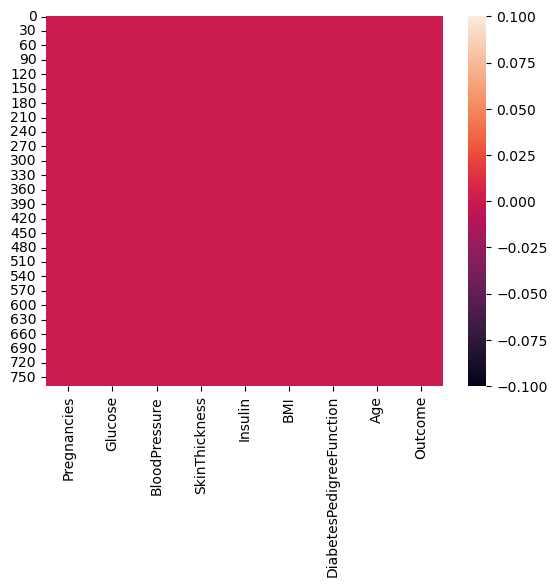

In [11]:
sns.heatmap(data.isnull())

In [12]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

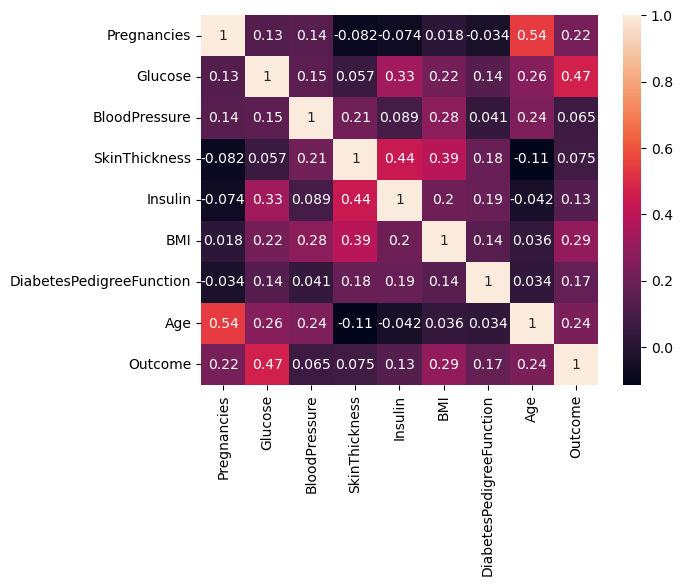

In [13]:
sns.heatmap(data.corr(), annot = True)

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

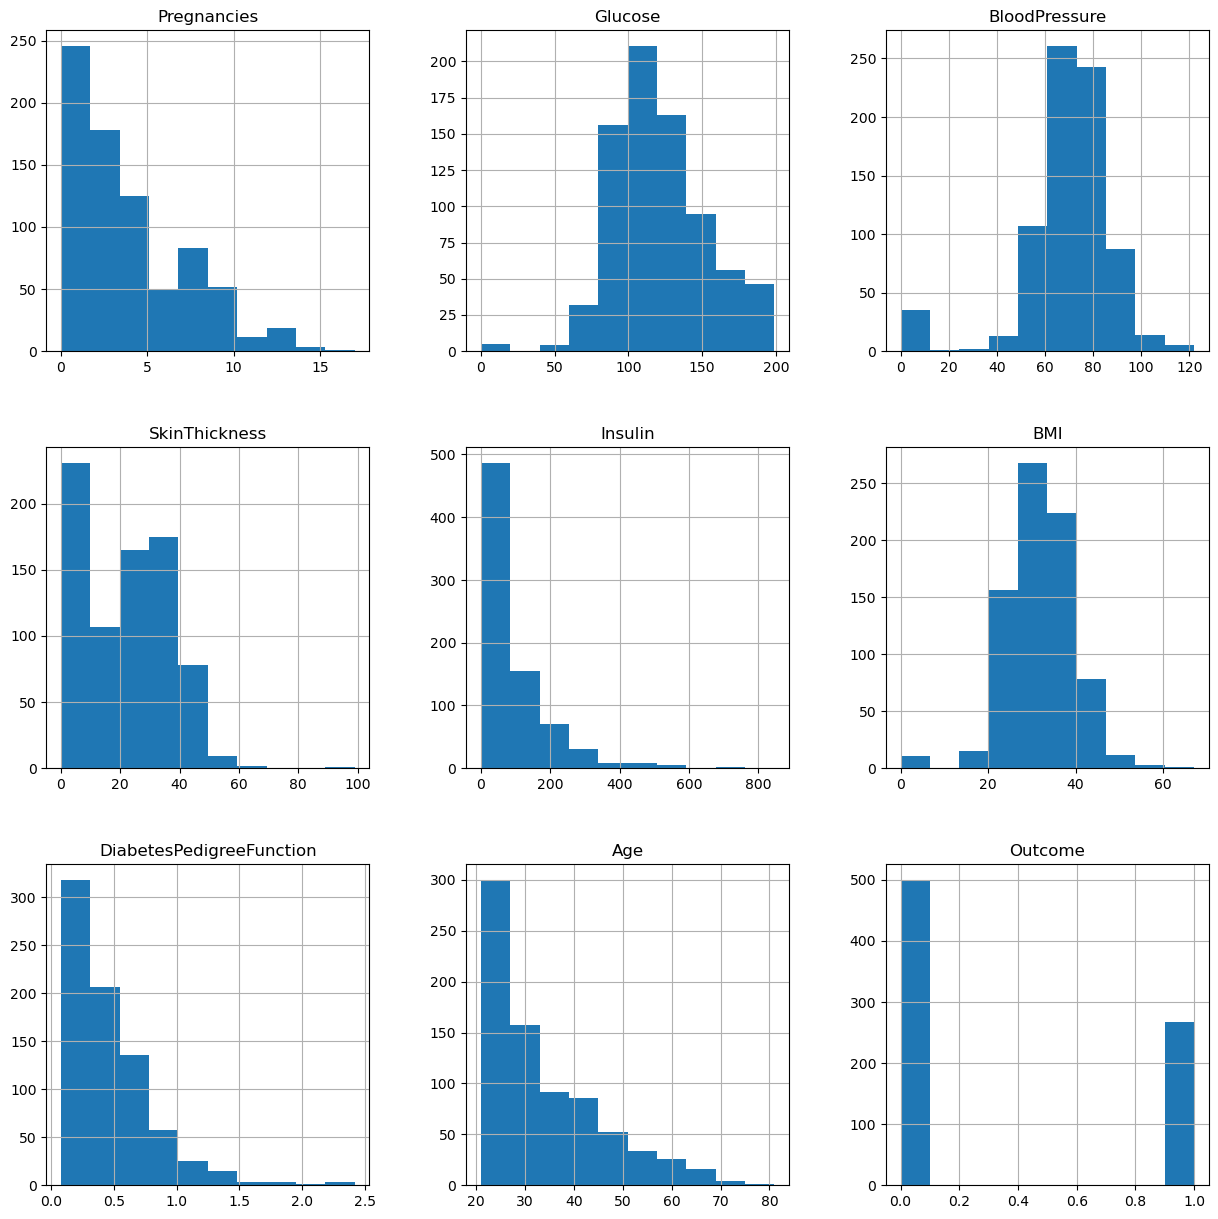

In [14]:
data.hist(figsize = (15, 15))

In [16]:
X = data.drop("Outcome", axis=1)
Y = data["Outcome"]

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

In [18]:
X_train.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
235,4,171,72,0,0,43.6,0.479,26
576,6,108,44,20,130,24.0,0.813,35
22,7,196,90,0,0,39.8,0.451,41
451,2,134,70,0,0,28.9,0.542,23
616,6,117,96,0,0,28.7,0.157,30


In [19]:
X_test.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
568,4,154,72,29,126,31.3,0.338,37
620,2,112,86,42,160,38.4,0.246,28
456,1,135,54,0,0,26.7,0.687,62
197,3,107,62,13,48,22.9,0.678,23
714,3,102,74,0,0,29.5,0.121,32


In [20]:
Y_train.head(5)

235    1
576    0
22     1
451    1
616    0
Name: Outcome, dtype: int64

In [21]:
Y_test.head(5)

568    0
620    0
456    0
197    1
714    0
Name: Outcome, dtype: int64

In [24]:
X_train.shape

(576, 8)

In [26]:
X_test.shape

(192, 8)

In [27]:
Y_train.shape

(576,)

In [28]:
Y_test.shape

(192,)

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
lr=LogisticRegression()

In [34]:
lr.fit(X_train,Y_train)
ypred=lr.predict(X_test)

In [35]:
lr.score(X_test,Y_test)

0.734375

In [43]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []

for i in range(1,15):
   knn = KNeighborsClassifier(i)
   knn.fit(X_train, Y_train)

   train_scores.append(knn.score(X_train, Y_train))
   test_scores.append(knn.score(X_test, Y_test))

In [44]:
train_scores

[1.0,
 0.8368055555555556,
 0.8611111111111112,
 0.8211805555555556,
 0.8385416666666666,
 0.8003472222222222,
 0.8020833333333334,
 0.7934027777777778,
 0.8020833333333334,
 0.7881944444444444,
 0.7916666666666666,
 0.7847222222222222,
 0.796875,
 0.7777777777777778]

In [45]:
test_scores

[0.6979166666666666,
 0.6875,
 0.6875,
 0.671875,
 0.6927083333333334,
 0.6875,
 0.6875,
 0.671875,
 0.6979166666666666,
 0.6927083333333334,
 0.6979166666666666,
 0.6875,
 0.6822916666666666,
 0.6979166666666666]

In [46]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print("Max train score {} % and k = {}".format(max_train_score*100,list(map(lambda x : x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [47]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print("Max test score {} % and k = {}".format(max_test_score*100,list(map(lambda x : x+1, test_scores_ind))))

Max test score 69.79166666666666 % and k = [1, 9, 11, 14]


In [48]:
knn = KNeighborsClassifier(14)
knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)

0.6979166666666666

Text(0.5, 23.52222222222222, 'Predicted label')

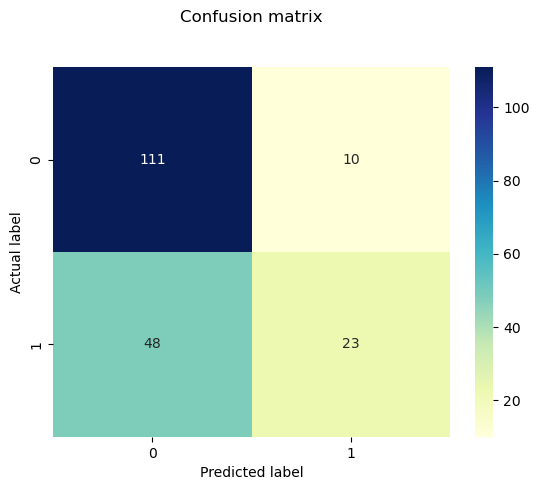

In [49]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
con_matrix = metrics.confusion_matrix(Y_test, y_pred)
p = sns.heatmap(pd.DataFrame(con_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [50]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.92      0.79       121
           1       0.70      0.32      0.44        71

    accuracy                           0.70       192
   macro avg       0.70      0.62      0.62       192
weighted avg       0.70      0.70      0.66       192



In [51]:
from sklearn.metrics import roc_curve
y_pred_prob = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

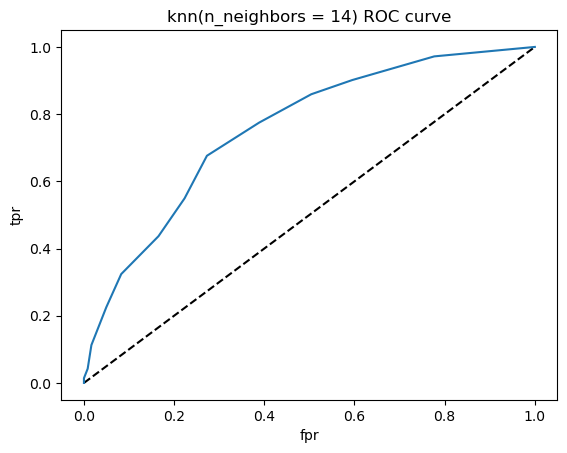

In [52]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('knn(n_neighbors = 14) ROC curve')
plt.show()

In [66]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have X_train and y_train as your training data and labels
# X_train represents the features, and y_train represents the labels

# Define your scaler
scaler = StandardScaler()

# Assuming you have X_train, which is your training data
# scaler should be fitted on the training data
scaler.fit(X_train)

# Input data for prediction
input_data = (6, 179, 99, 45, 140, 48.5, 0.686, 34)

# Convert input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)

# Create and fit the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # Replace 5 with your desired number of neighbors
knn.fit(X_train, Y_train)  # Fit the model with your training data and labels

# Make predictions
prediction = knn.predict(std_data)

# Check the prediction and print the result
if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

The person is diabetic


In [69]:
import numpy as np

# Take user input for each value in the input_data tuple
pregnancies = float(input("Enter the number of Pregnancies: "))
glucose = float(input("Enter Glucose level: "))
blood_pressure = float(input("Enter Blood Pressure: "))
skin_thickness = float(input("Enter Skin Thickness: "))
insulin = float(input("Enter Insulin level: "))
bmi = float(input("Enter BMI: "))
diabetes_pedigree = float(input("Enter Diabetes Pedigree Function: "))
age = float(input("Enter Age: "))

input_data = (pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree, age)

# Rest of your code for data processing and prediction
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
std_data = scaler.transform(input_data_reshaped)
prediction = knn.predict(std_data)

if prediction[0] == 0:
    print('The person is not diabetic')
else:
    print('The person is diabetic')

Enter the number of Pregnancies: 2
Enter Glucose level: 121
Enter Blood Pressure: 21
Enter Skin Thickness: 21212
Enter Insulin level: 21
Enter BMI: 33
Enter Diabetes Pedigree Function: 11
Enter Age: 22
The person is not diabetic
